<a href="https://colab.research.google.com/github/jassatish/Exploratory-Data-Analysis---Terrorism/blob/main/Exploratory_Data_Analysis_Terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Import Libraries

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual settings
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

# Step 2: Load the Dataset

In [10]:
# Load the dataset
df = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='ISO-8859-1')

# Display the first few rows of the dataset
print(df.head())

        eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY 

<ipython-input-10-89cfd767d272>:2: DtypeWarning: Columns (4,31,33,62,76,79,94,96,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='ISO-8859-1')


# Step 3: Data Cleaning

In [11]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Handle missing values by filling them with 'Unknown' for categorical and 0 for numerical data
df.fillna({
    'country_txt': 'Unknown',
    'region_txt': 'Unknown',
    'attacktype1_txt': 'Unknown',
    'iyear': 0,
    'imonth': 0,
    'iday': 0,
    'nkill': 0,
    'nwound': 0
}, inplace=True)

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Missing values in each column:
 eventid           0
iyear             0
imonth            0
iday              0
approxdate    23344
              ...  
INT_LOG           1
INT_IDEO          1
INT_MISC          1
INT_ANY           1
related       22339
Length: 135, dtype: int64
Number of duplicate rows: 0


# Step 4: Basic Statistics

In [12]:
# Get basic statistics
print(df.describe())

# Unique values in critical columns
print("Unique countries:", df['country_txt'].nunique())
print("Unique regions:", df['region_txt'].nunique())
print("Unique attack types:", df['attacktype1_txt'].nunique())

            eventid         iyear        imonth          iday      extended  \
count  2.336500e+04  23365.000000  23365.000000  23365.000000  23365.000000   
mean   1.979562e+11   1979.498780      6.239076     15.119966      0.017633   
std    3.669247e+08      3.671631      3.369314      8.924484      0.131617   
min    1.970000e+11   1970.000000      0.000000      0.000000      0.000000   
25%    1.978012e+11   1978.000000      3.000000      7.000000      0.000000   
50%    1.980082e+11   1980.000000      6.000000     15.000000      0.000000   
75%    1.982120e+11   1982.000000      9.000000     23.000000      0.000000   
max    1.984093e+11   1986.000000     12.000000     31.000000      1.000000   

            country        region      latitude     longitude   specificity  \
count  23365.000000  23365.000000  22256.000000  2.225600e+04  23364.000000   
mean     169.702846      5.260518     23.080003 -3.904905e+03      1.344119   
std      159.801963      3.302588     24.379525  5.

# Step 5: Visualization
Visualize the data to understand trends and distributions:

<ipython-input-13-fe50d9a8419c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='iyear', data=df, palette='viridis')


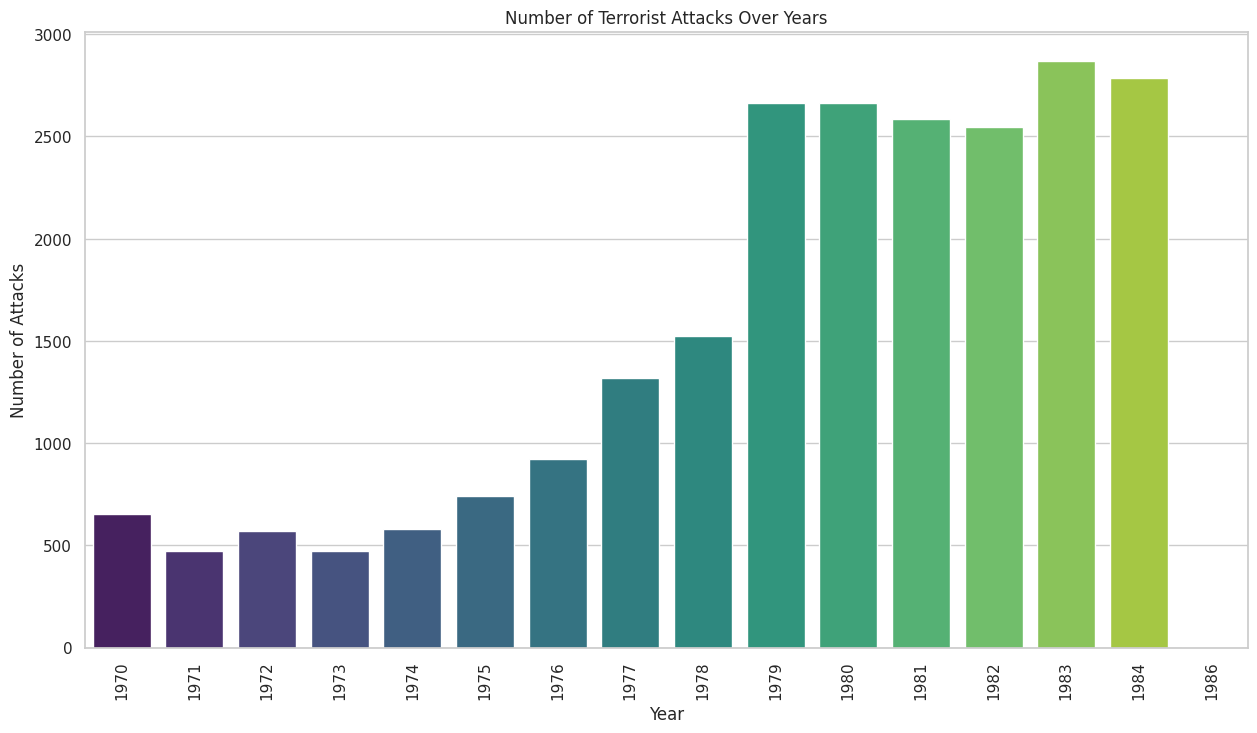

<ipython-input-13-fe50d9a8419c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='region_txt', data=df, order=df['region_txt'].value_counts().index, palette='viridis')


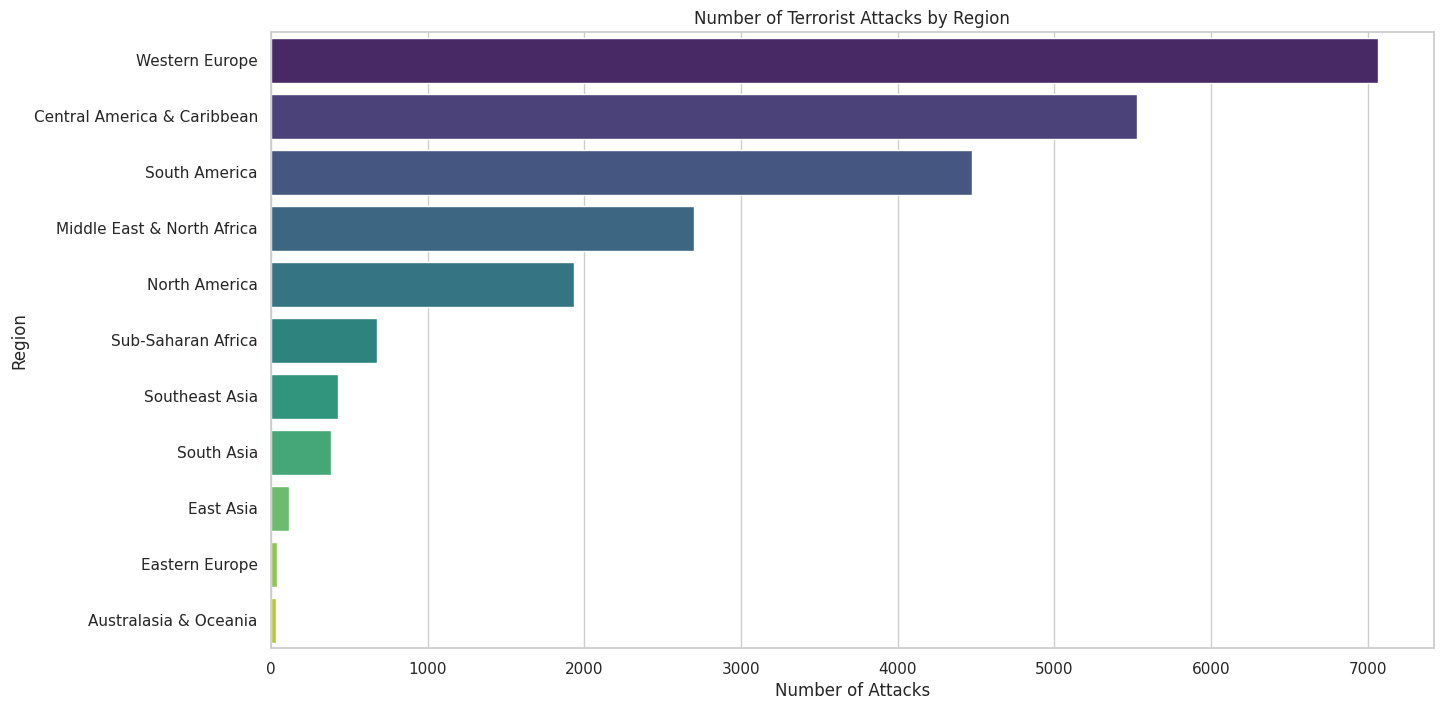

<ipython-input-13-fe50d9a8419c>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


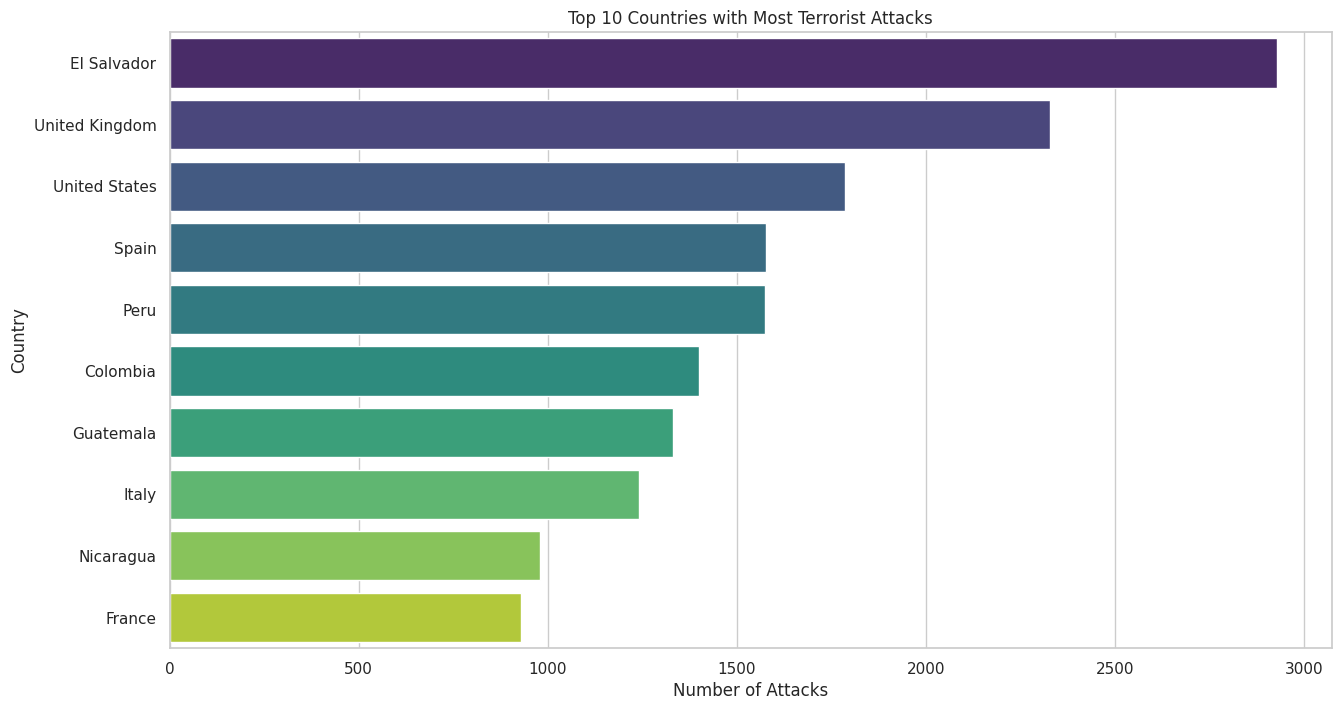

<ipython-input-13-fe50d9a8419c>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='attacktype1_txt', data=df, order=df['attacktype1_txt'].value_counts().index, palette='viridis')


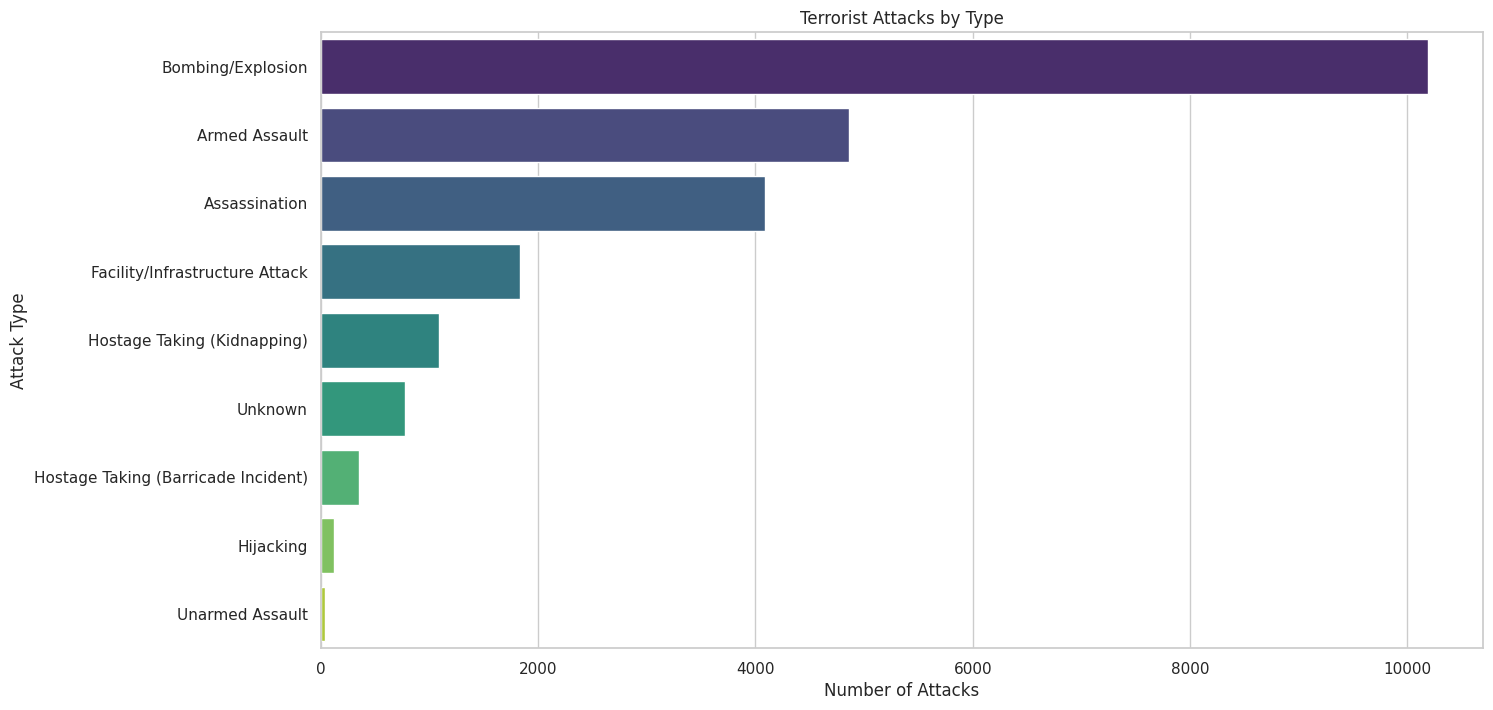

In [13]:
# Terrorist attacks over the years
plt.figure(figsize=(15, 8))
sns.countplot(x='iyear', data=df, palette='viridis')
plt.title('Number of Terrorist Attacks Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=90)
plt.show()

# Terrorist attacks by region
plt.figure(figsize=(15, 8))
sns.countplot(y='region_txt', data=df, order=df['region_txt'].value_counts().index, palette='viridis')
plt.title('Number of Terrorist Attacks by Region')
plt.xlabel('Number of Attacks')
plt.ylabel('Region')
plt.show()

# Terrorist attacks by country (Top 10)
plt.figure(figsize=(15, 8))
top_countries = df['country_txt'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries with Most Terrorist Attacks')
plt.xlabel('Number of Attacks')
plt.ylabel('Country')
plt.show()

# Terrorist attacks by attack type
plt.figure(figsize=(15, 8))
sns.countplot(y='attacktype1_txt', data=df, order=df['attacktype1_txt'].value_counts().index, palette='viridis')
plt.title('Terrorist Attacks by Type')
plt.xlabel('Number of Attacks')
plt.ylabel('Attack Type')
plt.show()

# Step 6: Insights
Finally, derive and summarize insights based on the analysis

In [14]:
# Hot Zones of Terrorism
hot_zones = df['country_txt'].value_counts().head(10)
print("Top 10 Hot Zones of Terrorism:\n", hot_zones)

# Attack Trends Over the Years
attack_trends = df['iyear'].value_counts().sort_index()
print("Attack Trends Over the Years:\n", attack_trends)

# Common Types of Attacks
common_attacks = df['attacktype1_txt'].value_counts().head(5)
print("Most Common Types of Attacks:\n", common_attacks)

# Summary of Security Issues and Insights
print("""
Security Issues and Insights:
1. The Middle East & North Africa and South Asia are prominent hot zones for terrorist activities.
2. Countries like Iraq, Afghanistan, and Pakistan face the highest number of attacks, indicating significant security concerns.
3. The number of terrorist attacks has shown fluctuations over the years, with noticeable peaks during certain periods.
4. Bombings and armed assaults are the most common types of attacks, suggesting vulnerabilities in public safety and surveillance systems.
5. Effective counter-terrorism measures, political stability, and enhanced security protocols are critical to mitigating these threats.
""")

Top 10 Hot Zones of Terrorism:
 country_txt
El Salvador       2928
United Kingdom    2328
United States     1787
Spain             1578
Peru              1575
Colombia          1401
Guatemala         1332
Italy             1241
Nicaragua          979
France             930
Name: count, dtype: int64
Attack Trends Over the Years:
 iyear
1970     651
1971     471
1972     568
1973     473
1974     581
1975     740
1976     923
1977    1319
1978    1526
1979    2662
1980    2662
1981    2586
1982    2544
1983    2870
1984    2788
1986       1
Name: count, dtype: int64
Most Common Types of Attacks:
 attacktype1_txt
Bombing/Explosion                 10191
Armed Assault                      4865
Assassination                      4092
Facility/Infrastructure Attack     1837
Hostage Taking (Kidnapping)        1089
Name: count, dtype: int64

Security Issues and Insights:
1. The Middle East & North Africa and South Asia are prominent hot zones for terrorist activities.
2. Countries like Iraq, Af